<a href="https://colab.research.google.com/github/Danalmestadi/-T5-SalaryPredictionExercise/blob/main/SalaryPredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Salary Prediction </h1>

## About Dataset

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and *salary*.

### Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.shape

(375, 6)

In [5]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [10]:
df.duplicated().sum()

49

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [14]:
df_num=df.select_dtypes(include=['float64'])
df_cat=df.select_dtypes(include=['object'])

In [24]:
df2=pd.get_dummies(df_cat, columns=df_cat.columns)
df=pd.concat([df_num,df2],axis=1)
df.head()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
x=df
y=df['Salary']
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size=0.20)

In [51]:

s=[
    ('scaler',StandardScaler()),
    ('lr',LinearRegression())
]

pipe =Pipeline(s)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

In [42]:
mse= mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)
print('R-squared:',r_squared)
print('Mean Squared Error:',mse)

R-squared: 0.999932922387663
Mean Squared Error: 190669.50224931506


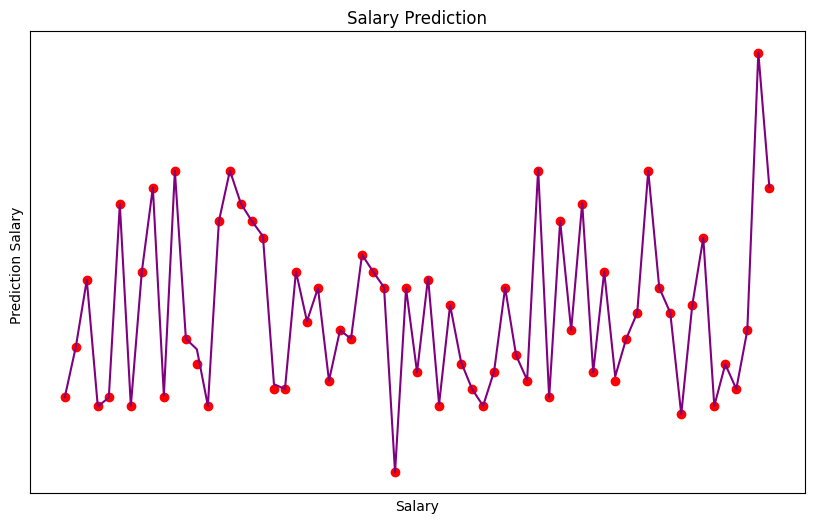

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='red' )
plt.plot(range(len(y_pred)),y_pred, color='purple')
plt.title("Salary Prediction")
plt.xlabel("Salary")
plt.ylabel("Prediction Salary ")
plt.xticks(())
plt.yticks(())

plt.show()

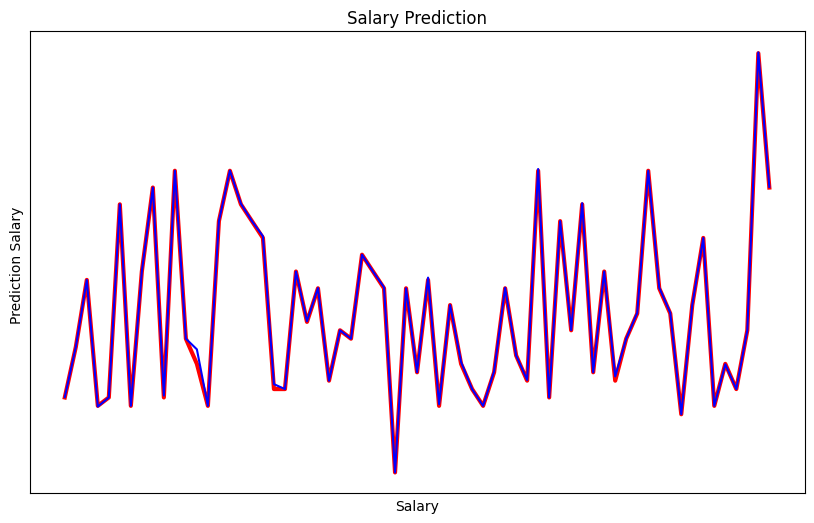

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)),y_test,color='red', linewidth=3  )
plt.plot(range(len(y_pred)),y_pred, color='blue')
plt.title("Salary Prediction")
plt.xlabel("Salary")
plt.ylabel("Prediction Salary ")
plt.xticks(())
plt.yticks(())

plt.show()